![Machine Learning Project](https://pbs.twimg.com/media/FKwadb3WUAERzHi?format=jpg&name=medium)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

In this project, we have taken a dataset with 3119 sets of news articles about the COVID-19 virus. The dataset consists of a collection of true and fake news related to COVID-19. The dataset consists of news between the period of December 2019- July 2020. The dataset does have an additional subcategory stating that the news is true, false, or partially false. But for the sake of clarification, the false and partially false news has a label value of 0, and the true news has a label value of 1. In this project, we have taken into account the label value instead as partially false news is also considered false. Our project goal was to train a model to recognize the news article as true or false, with maximum accuracy.
https://data.mendeley.com/datasets/zwfdmp5syg/1

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Check Working Directory </font>

In [71]:
import os
os.getcwd()

'C:\\Users\\amira\\Data Science\\Semester 1\\Introduction to Machine Learning\\Project\\Source Code'

#### <font color = blue>Import the Libraries

In [73]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.text import Text
import matplotlib.pyplot as plt

#### <font color = blue>Load the Dataset

In [74]:
df = pd.read_excel('Dataset/fake_new_dataset.xlsx')
df1 = pd.read_excel('Dataset/fake_new_dataset1.xlsx')
df.tail(5)

,Unnamed: 0,title,text,subcategory,label
3113,2998,2019-nCoV: Health dept. on full alert,Quarantine advised for 80 persons across the S...,true,1
3114,2999,Screening machine for corona virus launched at...,South Sudan has begun screening all travelers ...,true,1
3115,3000,Coronavirus (2019-nCoV),Coronavirus (2019-nCoV) is a new respiratory i...,true,1
3116,3001,Characterizing Patients Hospitalized With COVI...,Characterizing Patients Hospitalized With COVI...,false news,0
3117,3002,Corona Virus WARNING,Just something to be prepared for… but then it...,false news,0


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization </font>

#### <font color = blue>Data Information

In [75]:
print(df.size)
print(df.shape)
print(df.columns)
print(df.info())

15590
(3118, 5)
Index(['Unnamed: 0', 'title', 'text', 'subcategory', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3118 non-null   int64 
 1   title        3118 non-null   object
 2   text         3118 non-null   object
 3   subcategory  3118 non-null   object
 4   label        3118 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 121.9+ KB
None


#### <font color = blue>Check Missing Value

In [76]:
df.isnull().sum()

Unnamed: 0     0
title          0
text           0
subcategory    0
label          0
dtype: int64

#### <font color = blue>Predictor and Target Attributes

In [77]:
text = df.iloc[:, 1]             
label = df.iloc[:, -1]          

#### <font color = blue>Extracting the Number of Examples for Each Class

In [78]:
false_news = label[label == 0].shape[0]
true_news = label[label == 1].shape[0]
print('false_news =', false_news)
print('true_news =', true_news)

false_news = 1057
true_news = 2061


#### <font color = blue>Visualize the Class Label in Percentage

In [79]:
news = [false_news, true_news]
label = ["Fake News", "Positive News"]

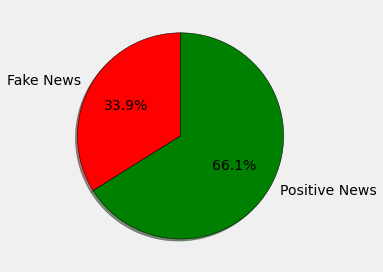

In [80]:
plt.pie(news, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

#### <font color = blue>Plot  Number of Examples of Each Class

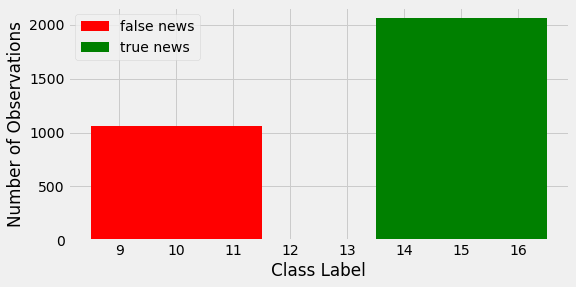

In [81]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 4), facecolor = None)
plt.bar(10,false_news,3, label="false news", color = 'red')
plt.bar(15,true_news,3, label="true news", color = 'green')
plt.legend()
plt.ylabel('Number of Observations')
plt.xlabel('Class Label')
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>
In this part, we did data preprocessing. firstly, we did text cleaning with the help of Regular Expression and then we apply preprocessing operations like Tokenization to make a token of each sentence, then remove stop words like "the", "a", "at" etc and then apply stemming to reducing a word to its word stem. After that, we apply the IF-IDF model for feature extraction and we took 5000 most frequent words from dictionaries. In the end, we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2 respectively. 

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Text Cleaning </font>
> <b>Lowercase <br> Remove Punctuation <br> Remove Urls <br> Removing @tags <br> Remove Special Characters </b>

#### <font color = blue>2.1.1: Lower Case

In [11]:
def lower_case(text):
    return text.lower()

df['text'] = df['text'].apply(lower_case)

#### <font color = blue>2.1.2: Remove Punctuation

In [12]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['text'] = df['text'].apply(remove_punct)

#### <font color = blue>2.1.3: Remove URLs

In [13]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['text'] = df['text'].apply(remove_URL)

#### <font color = blue>2.1.4: Removing @tags

In [14]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['text'] = df['text'].apply(remove_tag)

#### <font color = blue>2.1.5: Remove Special Characters

In [15]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['text'] = df['text'].apply(remove_special)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46>  Preprocessing Operations </font>
> <b>Tokenizing <br> Removing Stop Words <br> Lemmatization <b> <br> WordCloud </b>

#### <font color = blue>2.2.1: Tokenizing

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [19]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['text'] = df['text'].apply(tokenize)

#### <font color = blue>2.2.2: Removing StopWords

In [20]:
from nltk.corpus import stopwords

In [23]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text

df['text'] = df['text'].apply(remove_stop)

#### <font color = blue>2.2.3: Lemmatization

In [27]:
from nltk.stem import WordNetLemmatizer

In [28]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

df['text'] = df['text'].apply(Lemmatize)

#### <font color = blue>2.2.4: WordCloud

In [29]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

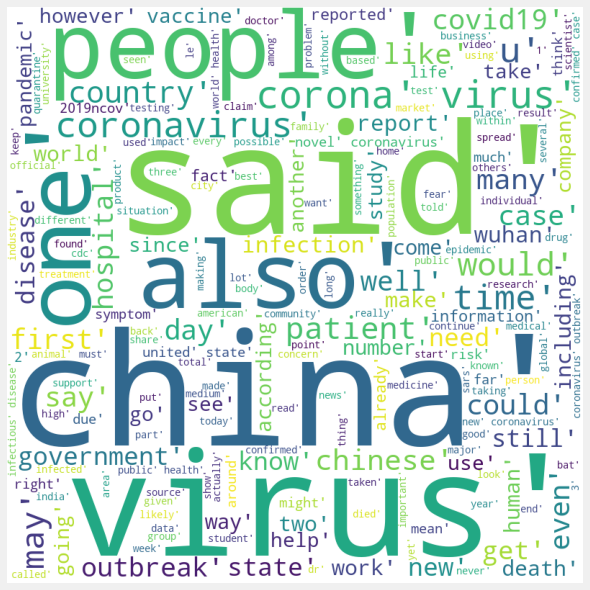

In [33]:
# WordCloud of fake News
false_news = df[df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in false_news.text:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

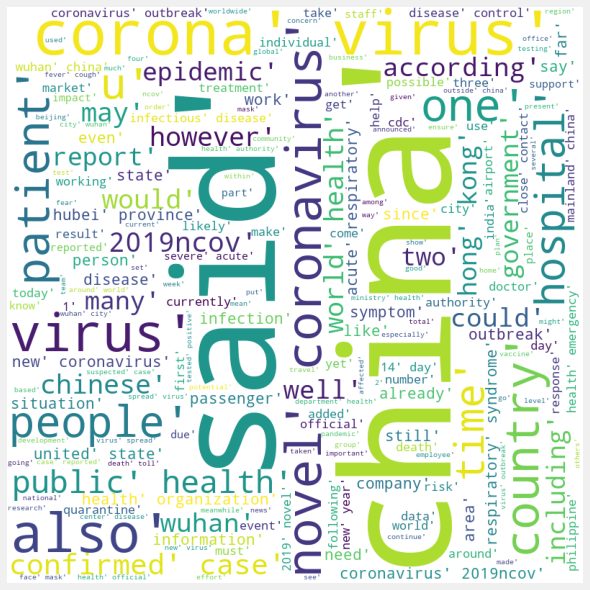

In [34]:
# WordCloud of Positive News
true_news = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in true_news.text:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46>  Feature Extraction </font>
> <font color = blue><b>TF-IDF Model </b> <br> </font> 1. Implementation from Scratch <br> 2. Implementation with Scikit-Learn  

#### <font color = blue>2.3.1: Implementation from Scratch

In [35]:
#Creating the histogram
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [36]:
# Take a 5000 most frequent words from dictionaries
freq_words = heapq.nlargest(5000, word2count, key = word2count.get)

In [37]:
# IDF Matrix
word_idfs = {}
for word in  freq_words:
    doc_count = 0
    for data in dataset:
        if word in nltk.word_tokenize(data):
            doc_count += 1
    word_idfs[word] = np.log((len(dataset)/doc_count)+1)

In [38]:
# TF Matrix
tf_matrix = {}
for word in freq_words:
    doc_tf = []
    for data in dataset:
        frequency = 0
        for w in nltk.word_tokenize(data):
            if w== word:
                frequency += 1
        tf_word = frequency/len(nltk.word_tokenize(data))
        doc_tf.append(tf_word)
    tf_matrix[word] = doc_tf

In [39]:
# TF-IDF Calculation
tfidf_matrix = []
for word in tf_matrix.keys():
    tfidf = []
    for value in tf_matrix[word]:
        score = value * word_idfs[word]
        tfidf.append(score)
    tfidf_matrix.append(tfidf)

In [40]:
# Coverted  TF-IDF model  into 2d
X = np.asarray(tfidf_matrix)

In [41]:
# Transpose to convert row into col
text = np.transpose(X)

#### <font color = blue>2.3.2: Implementation with Scikit-learn

In [42]:
# import TF-IDF model from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# init the TF-IDF model and take 5000 most frequent words from dictionaries
vectorizer = TfidfVectorizer(max_features= 5000)

In [44]:
# select the text data
corpus = df1['text']

In [45]:
# fit corpus data into Tf-IDF Model
text1 = vectorizer.fit_transform(corpus).toarray()

In [46]:
# shape of predictor attribute
text1.shape

(3118, 5000)

In scikit-learn TF-IDF Model process fastly  as compare to scrach solution

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46>  Split the Dataset </font>

In [50]:
from sklearn.model_selection import train_test_split

#### <font color = blue>2.4.1: Split the dataset into Train and Test

In [51]:
label = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(text1, label, test_size=0.2, random_state=0)

#### <font color = blue>2.4.2: Training Data

In [52]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (2494, 5000)
y_train (2494,)


#### <font color = blue>2.4.3: Testing Data

In [53]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (624, 5000)
y_test (624,)


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Building & Testing the Model </font>
In this part, we build our model to predict fake news and True news. we implement  Multilayer Perceptrons and Support Vector Machine and we did it in two ways from scratch and using scikit-learn as well. And when we test our model accuracy then Support Vector Machine with scikit-learn gave a much better result.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46>  Multilayer Perceptrons </font>

#### <font color = blue>3.1.1: Implement from Scrach 

In [51]:
# Building Model from Scratch
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

In [52]:
# Testing The Model
if __name__ == "__main__":

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    mlp = Perceptron(learning_rate=0.01, n_iters=500)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    print("MLP Accuracy", accuracy(y_test, y_pred))

MLP Accuracy 0.7724358974358975


#### <font color = blue>3.1.2: Implement with Scikit-learn 

In [53]:
# import MLP Classifier from sklearn
from sklearn.neural_network import MLPClassifier

In [54]:
# init the MLP Classifier
mlp1 = MLPClassifier()

In [55]:
# fit the data into MLP Classifier
mlp1.fit(X_train,y_train)

MLPClassifier()

In [57]:
# predict the test data
y_pred1 = mlp1.predict(X_test)

In [58]:
# accuracy Score 
from sklearn.metrics import accuracy_score
 
print('Accuracy Score:', accuracy_score(y_test, y_pred1)) 

Accuracy Score: 0.782051282051282


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.2: </font> <font color = #41EA46>  Support Vector Machine </font>

#### <font color = blue>3.2.1: Implement from Scrach

In [59]:
# Building Model from Scratch
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [60]:
# Testing The Model
if __name__ == "__main__":

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    svm = SVM()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print("SVM Accuracy", accuracy(y_test, y_pred))

SVM Accuracy 0.6810897435897436


#### <font color = blue>3.2.1: Implement with Scikit-learn 

In [47]:
# Import SVM from sklearn
from sklearn.svm import SVC 

In [54]:
# init the SVM Classifier model
svm1 = SVC(kernel = 'linear', random_state= 0) 

In [55]:
# fit the data into SVM Classifier model
svm1.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [56]:
# predict the test data
y_pred4 = svm1.predict(X_test)

In [57]:
# Accuracy Score 
from sklearn.metrics import accuracy_score
 
print('Accuracy Score:', accuracy_score(y_test, y_pred4)) 

Accuracy Score: 0.8317307692307693


As you can see that Support Vector Machine with Scikit Learn has give the best result. So, we will use that for evaluation and for application as well.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Best Model Result </font>
In this part, we evaluate the Support Vector Machine with Scikit Learn because it gave a good result. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46>  Confusion Matrix </font>

In [66]:
from sklearn.metrics import confusion_matrix

#### <font color = blue>4.1.1: Making a Confusion Matrix

In [67]:
confusion_matrix= confusion_matrix(y_test, y_pred4)
print(confusion_matrix)

#[row, column]
TP = confusion_matrix[1, 1]        
TN = confusion_matrix[0, 0]           
FP = confusion_matrix[0, 1]           
FN = confusion_matrix[1, 0]

[[135  64]
 [ 41 384]]


#### <font color = blue>4.1.2: Visualize the Confusion Matrix

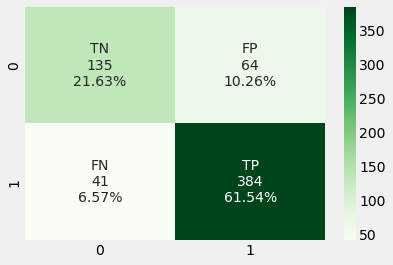

In [68]:
group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Greens')

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>4.2.1: Calculate the Results

In [68]:
# Accuracy Score
Accuracy = accuracy_score(y_test, y_pred4)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_test, y_pred4)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_test, y_pred4)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_test, y_pred4)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(y_test, y_pred4)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_test, y_pred4)
print('ROC Area:', Roc) 

Accuracy Score: 0.8317307692307693
Precision Score: 0.8571428571428571
True positive Rate: 0.9035294117647059
False positive Rate 0.32160804020100503
F1 Score: 0.879725085910653
Specificity: 0.678391959798995
Mean Absolute Error: 0.16826923076923078
ROC Area: 0.7909606857818504


#### <font color = blue>4.2.2: Visualize the Results

<BarContainer object of 8 artists>

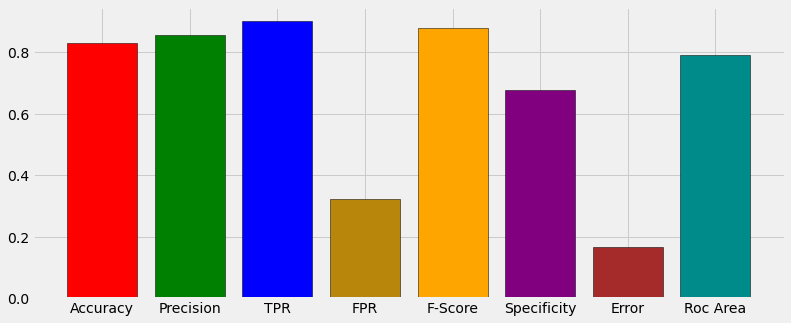

In [70]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Save and Use the Model </font>
In the last part, we save our model using the pickle library and then use the pickle file for prediction and later we use this pickle file to build the application.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 5.1: </font> <font color = #41EA46> Save and Load the Model  </font>

In [71]:
# import pickle
import pickle  

In [59]:
# save the model
Support_Vector_Machine = open("Save Model/SVM.pkl","wb")          
pickle.dump(svm1,Support_Vector_Machine)                                  
Support_Vector_Machine.close()   

In [60]:
# Load the model
model = open("Save Model/SVM.pkl","rb")           
model = pickle.load(model)                                 
model

SVC(kernel='linear', random_state=0)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 5.2: </font> <font color = #41EA46> Use the model for Prediction </font>                                

In [61]:
# Positive News example
comment = ["Coronavirus known as Covid-19 starts from Wuhan city of China and affects rapidly around all over the world"]
vect = vectorizer.transform(comment).toarray()
model.predict(vect)

if model.predict(vect) == 1:
    print("Positive News")
else:
    print("Fake News")

Positive News


In [62]:
# Fake News example
comment = ["covid-19 is just like a flu"]
vect = vectorizer.transform(comment).toarray()
model.predict(vect)

if model.predict(vect) == 1:
    print("Positive News")
else:
    print("Fake News")

Fake News


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)